## STORYLLING 

A história é baseada em um CEO que oferece serviços de consultoria para imobiliárias e clientes individuais na região de Washington, nos Estados Unidos. Meu objetivo é trabalhar com os dados relacionados aos negócios do CEO, a fim de receber demandas para análise e fornecer a melhor orientação aos seus clientes. Meus serviços são valiosos em situações que exigem organização e análise simplificada e objetiva dos dados, auxiliando na tomada de decisões e na obtenção de informações mais precisas para manter, comunicar e conquistar novos clientes.

In [55]:
## começar PLAY aqui ##
import seaborn as srn
import pandas as pd
import numpy as np

tabelaImovel = pd.read_csv('kc_house_data.csv')
tabelaImovel

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          1180.0              0      1955             0    98178  47.5112   
1          2170.0            400      1951          1991    98125  47.7210   
2           770.0              0      1933             0    98028  47.7379   
3          1050.0            910      1965             0    98136  47.5208   
4          1680.0              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [56]:
####  REMOÇÂO DE DADOS DUPLICADOS ######
tabelaImovel = tabelaImovel.drop_duplicates()


#tabelaImovel.replace(' ', np.nan, inplace=True) ## passa todos valoes em branco para nulos
tabelaImovel.dropna(axis=0, how='all', inplace=True) # deleta linhas preenchida de NULOS

In [57]:
########################## CHECAR E REMOVER VALORES NULOS ###############################
tabelaImovel.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
## não existe valores 0 para esse atributo, entao substituir pela media
#tabelaImovel.loc[tabelaImovel['sqft_above'] == 0]
tabelaImovel['sqft_above'].fillna(tabelaImovel['sqft_above'].mean(), inplace=True)
print(tabelaImovel.isnull().sum())
#########################################################################

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [59]:

########################### LOTES TRADUZIDOS  ##################################
## waterfront - 0/1 -> passar para sim ou nao
## view - à vista que o imóvel oferece
# "grade" se refere ao nível de qualidade geral da construção e dos acabamentos de um imóvel,nota 1 a 133
# sqft_lot - mais espaço para recreação ao ar livre, privacidade e paisagismo
# sqft_living - se refere à medida da área habitável de um imóvel, excluindo áreas como garagem, porão e sótão, por exemplo. 
# sqft_basement-  Essa medida é importante porque a área do porão pode ser usada como um espaço adicional para armazenamento, trabalho ou lazer
# sqft_above - spaço habitável acima do nível do solo de um imóvel, excluindo o porão. Essa medida inclui áreas como quartos, banheiros, cozinha, sala de estar, entre outros, que estão acima do nível do solo.
# sqft_lot15 -  do terreno da residência, medido até a linha da propriedade mais próxima 
# sqft_living15 - tamanho da construção em uma determinada área
tabelaImovel.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64


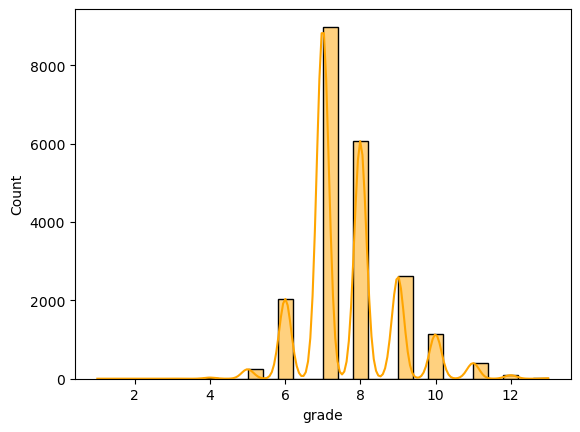

In [60]:
# pesquisa sobre a coluna Grade
# a grade é mais conveniente nota de 1 a 10 
import seaborn as sns
sns.histplot(tabelaImovel, x='grade', bins=30, color='orange', kde=True, stat="count");
print(tabelaImovel['grade'].value_counts().sort_index() )

In [61]:
## passar todos valores acima de 10 para se tornarem 10

tabelaImovel.loc[tabelaImovel['grade'] > 9, 'grade'] = 10
tabelaImovel

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          1180.0              0      1955             0    98178  47.5112   
1          2170.0            400      1951          1991    98125  47.7210   
2           770.0              0      1933             0    98028  47.7379   
3          1050.0            910      1965             0    98136  47.5208   
4          1680.0              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [62]:
## ajsutado 1 a 10 -> os valores 11,12,13 foram somandos ao 10
tabelaImovel['grade'].value_counts().sort_index()

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1636
Name: grade, dtype: int64

In [63]:
## AJUSTE DA GRADE REALIZADO

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


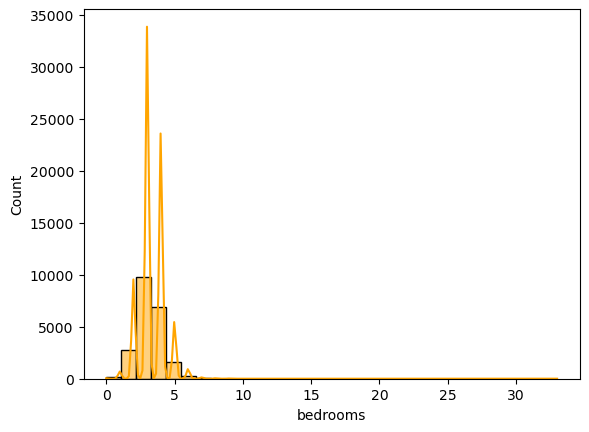

In [64]:
## OS BEDROOMS TEM OUTLINEAR OU DADOS ERRADOS
print(tabelaImovel['bedrooms'].value_counts().sort_index())
sns.histplot(tabelaImovel, x='bedrooms', bins=30, color='orange', kde=True, stat="count");

In [65]:
## o numero de quartos 11 e 33 , poderiam ser erros  mas pode ser um local de hospedagem,etc
# então é valido, outliers
tal = tabelaImovel.loc[tabelaImovel['bedrooms'] > 10]
tal.head()

id             date     price  bedrooms  bathrooms  \
8757   1773100755  20140821T000000  520000.0        11       3.00   
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
8757          3000      4960     2.0           0     0  ...      7   
15870         1620      6000     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
8757       2400.0            600      1918          1999    98106  47.5560   
15870      1040.0            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
8757  -122.363           1420        4960  
15870 -122.331           1330        4700  

[2 rows x 21 columns]

In [66]:
################### REIDEX COLUNA #############
tabelaImovel = tabelaImovel.reindex(columns=['id', 'date','price',
                                 'bedrooms', 'bathrooms','floors','waterfront',
                                 'view','condition', 'grade','yr_built',
                                 'yr_renovated','sqft_living', 'sqft_lot',
                                 'sqft_above', 'sqft_basement','sqft_living15',
                                 'sqft_lot15', 'zipcode','lat', 'long',])
tabelaImovel

id             date     price  bedrooms  bathrooms  floors  \
0      7129300520  20141013T000000  221900.0         3       1.00     1.0   
1      6414100192  20141209T000000  538000.0         3       2.25     2.0   
2      5631500400  20150225T000000  180000.0         2       1.00     1.0   
3      2487200875  20141209T000000  604000.0         4       3.00     1.0   
4      1954400510  20150218T000000  510000.0         3       2.00     1.0   
...           ...              ...       ...       ...        ...     ...   
21608   263000018  20140521T000000  360000.0         3       2.50     3.0   
21609  6600060120  20150223T000000  400000.0         4       2.50     2.0   
21610  1523300141  20140623T000000  402101.0         2       0.75     2.0   
21611   291310100  20150116T000000  400000.0         3       2.50     2.0   
21612  1523300157  20141015T000000  325000.0         2       0.75     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  sqft_living  \
0               0     0          3      7  ...             0         1180   
1               0     0          3      7  ...          1991         2570   
2               0     0          3      6  ...             0          770   
3               0     0          5      7  ...             0         1960   
4               0     0          3      8  ...             0         1680   
...           ...   ...        ...    ...  ...           ...          ...   
21608           0     0          3      8  ...             0         1530   
21609           0     0          3      8  ...             0         2310   
21610           0     0          3      7  ...             0         1020   
21611           0     0          3      8  ...             0         1600   
21612           0     0          3      7  ...             0         1020   

       sqft_lot  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0          5650      1180.0              0           1340        5650   
1          7242      2170.0            400           1690        7639   
2         10000       770.0              0           2720        8062   
3          5000      1050.0            910           1360        5000   
4          8080      1680.0              0           1800        7503   
...         ...         ...            ...            ...         ...   
21608      1131      1530.0              0           1530        1509   
21609      5813      2310.0              0           1830        7200   
21610      1350      1020.0              0           1020        2007   
21611      2388      1600.0              0           1410        1287   
21612      1076      1020.0              0           1020        1357   

       zipcode      lat     long  
0        98178  47.5112 -122.257  
1        98125  47.7210 -122.319  
2        98028  47.7379 -122.233  
3        98136  47.5208 -122.393  
4        98074  47.6168 -122.045  
...        ...      ...      ...  
21608    98103  47.6993 -122.346  
21609    98146  47.5107 -122.362  
21610    98144  47.5944 -122.299  
21611    98027  47.5345 -122.069  
21612    98144  47.5941 -122.299  

[21613 rows x 21 columns]

In [67]:
################ REMOVER CARACTERES #########################################
tabelaImovel['date'] = tabelaImovel['date'].str.replace('T000000','')
tabelaImovel[['date']]
################################################################################

date
0      20141013
1      20141209
2      20150225
3      20141209
4      20150218
...         ...
21608  20140521
21609  20150223
21610  20140623
21611  20150116
21612  20141015

[21613 rows x 1 columns]

In [68]:
####### CONVERSOES ###### PARA SIMPLICAR A CONSULTA ###########################

# passando todos valores para tipo data = "ANO"
tabelaImovel['date'] = pd.to_datetime(tabelaImovel['date']).dt.year 
tabelaImovel['yr_built'] = pd.to_datetime(tabelaImovel['yr_built']).dt.year
tabelaImovel['yr_renovated'] = pd.to_datetime(tabelaImovel['yr_renovated']).dt.year

In [69]:
## melhor trabalhar com valores mais faceis para o caso
tabelaImovel['waterfront'] =tabelaImovel['waterfront'].astype(str) ## para nominal
tabelaImovel['bathrooms'] = tabelaImovel['bathrooms'].astype(int) ## para numero inteiro

In [70]:
## continuando sobre a conversão de waterfront
tabelaImovel.loc[tabelaImovel['waterfront'] == '0', 'waterfront'] = 'Não'
tabelaImovel.loc[tabelaImovel['waterfront'] == '1', 'waterfront'] = 'Sim'

#####################################################################################

In [71]:
tabelaImovel.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms          int32
floors           float64
waterfront        object
view               int64
condition          int64
grade              int64
yr_built           int64
yr_renovated       int64
sqft_living        int64
sqft_lot           int64
sqft_above       float64
sqft_basement      int64
sqft_living15      int64
sqft_lot15         int64
zipcode            int64
lat              float64
long             float64
dtype: object

In [72]:
# O TAMANHO DOS IMOVEIS ESTÃO COM VALORES EM PÉS, E NÃO METROS COMO USADO NO BRASIL
######################## CONVERSOES ###################################
## PASSANDO OS VALORES PARA METRO - SE TRATANDO DE ASSUNTOS BR
### multiplicar esse valor x 0,0929 par achar os metro2
tabelaImovel['sqft_living'] = tabelaImovel['sqft_living'] * 0.09290304
tabelaImovel['sqft_lot'] = tabelaImovel['sqft_lot'] * 0.09290304
tabelaImovel['sqft_above'] = tabelaImovel['sqft_above'] * 0.09290304
tabelaImovel['sqft_basement'] = tabelaImovel['sqft_basement'] * 0.09290304
tabelaImovel['sqft_living15'] =tabelaImovel['sqft_living15'] * 0.09290304
tabelaImovel['sqft_lot15'] = tabelaImovel['sqft_lot15'] * 0.09290304

In [73]:
###################### FINALIZAÇÂO LIMPEZA DE DADOS ################################

In [74]:
#########################################################################################

# QUESTÕES

## Quais são os imóveis mais caros e mais baratos? OK

In [75]:
# resposta para questão - valores miminios e mais altos.
tabelaImovel.groupby('price').max().sort_index()


id  date  bedrooms  bathrooms  floors waterfront  view  \
price                                                                       
75000.0    3421079032  2015         1          0     1.0        Não     0   
78000.0      40000362  2014         2          1     1.0        Não     0   
80000.0    8658300340  2014         1          0     1.0        Não     0   
81000.0    3028200080  2015         2          1     1.0        Não     0   
82000.0    3883800011  2014         3          1     1.0        Não     0   
...               ...   ...       ...        ...     ...        ...   ...   
5350000.0  8907500070  2015         5          5     2.0        Não     4   
5570000.0  2470100110  2014         5          5     2.0        Não     0   
6885000.0  9208900037  2014         6          7     2.0        Não     4   
7062500.0  9808700762  2014         5          4     2.0        Sim     2   
7700000.0  6762700020  2014         6          8     2.5        Não     3   

           condition  grade  yr_built  yr_renovated  sqft_living     sqft_lot  \
price                                                                           
75000.0            3      3      1970          1970    62.245037  4029.855166   
78000.0            1      5      1970          1970    72.464371  1518.407286   
80000.0            2      4      1970          1970    39.948307   469.160352   
81000.0            1      5      1970          1970    67.819219   926.707824   
82000.0            3      6      1970          1970    79.896614   968.607095   
...              ...    ...       ...           ...          ...          ...   
5350000.0          3     10      1970          1970   743.224320  2228.279414   
5570000.0          3     10      1970          1970   854.707968  3258.016710   
6885000.0          3     10      1970          1970   918.811066  2914.739977   
7062500.0          3     10      1970          1970   932.746522  3467.605968   
7700000.0          4     10      1970          1970  1119.481632  2564.123904   

           sqft_above  sqft_basement  sqft_living15   sqft_lot15  zipcode  \
price                                                                       
75000.0     62.245037       0.000000     107.767526  3983.868161    98022   
78000.0     72.464371       0.000000     157.935168   964.983876    98168   
80000.0     39.948307       0.000000     111.483648   696.772800    98014   
81000.0     67.819219       0.000000      79.896614   836.127360    98168   
82000.0     79.896614       0.000000     105.909466  1045.159200    98146   
...               ...            ...            ...          ...      ...   
5350000.0  624.308429     118.915891     427.353984  2020.641120    98004   
5570000.0  575.998848     278.709120     330.734822  2261.724509    98039   
6885000.0  823.120934      95.690131     421.779802  3969.746899    98039   
7062500.0  713.495347     219.251174     365.108947  2364.289465    98004   
7700000.0  796.179053     323.302579     366.037978   817.546752    98102   

               lat     long  
price                        
75000.0    47.2638 -121.906  
78000.0    47.4739 -122.280  
80000.0    47.6499 -121.909  
81000.0    47.4808 -122.315  
82000.0    47.4987 -122.341  
...            ...      ...  
5350000.0  47.6232 -122.220  
5570000.0  47.6289 -122.233  
6885000.0  47.6305 -122.240  
7062500.0  47.6500 -122.214  
7700000.0  47.6298 -122.323  

[4028 rows x 20 columns]

## Qual é a média de preços em conjunto com a maioria dos imóveis nesse conjunto de dados?

In [76]:
tabelaImovel['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [77]:
##  A MEDIA  $ 540 MIL 
tabelaImovel['price'].mean()


540088.1417665294

## O  Ceo pediu para qualificar os imoveis,  será uma consulta direciona e fácil de interagir.


In [78]:
## CRIANDO UM NOVO ATRIBUTO PARA DISTINGUIR A CLASSIFICAÇÃO DOS IMOVEIS

tabelaImovel.insert(10, 'class', '0') # CRIAR E REPOSICIONAR A NOVA COLUNA
tabelaImovel = tabelaImovel.reset_index(drop=True) # SEMPRE RESETAR INDEX ANTES DO FOR/IF/ETC

# DADOS FORNECIDOS PELO CEO - VALORES FICTICIOS - 
# ESTA EM DOLAR - IMOVEIS WASHINGTON

# 750mil a 2.9 mi  --Class D
# 3 mi a 6.9 mi -- Classe C
# 7 mi  a 8.9 mi  -- Classe B
# 9 mi +   Classe A 
for i in range(len(tabelaImovel)):
    if (tabelaImovel.loc[i, 'price'] >= 7.500000e+04) & (tabelaImovel.loc[i, 'price'] < 3.000000e+05):
        tabelaImovel.loc[i, 'class'] = 'class_D'
    elif (tabelaImovel.loc[i, 'price'] >= 3.000000e+05) & (tabelaImovel.loc[i, 'price'] < 7.000000e+05):
        tabelaImovel.loc[i, 'class'] = 'class_C'
    elif (tabelaImovel.loc[i, 'price'] >= 7.000000e+05) & (tabelaImovel.loc[i, 'price'] < 9.000000e+05):
        tabelaImovel.loc[i, 'class'] = 'class_B'
    elif (tabelaImovel.loc[i, 'price'] >= 9.000000e+05):
        tabelaImovel.loc[i, 'class'] = 'class_A'

In [79]:
# classes divididas
tabelaImovel.groupby('class').size()

class
class_A     2075
class_B     2337
class_C    12764
class_D     4437
dtype: int64

## Quais são os imoveis de frente com a água de boas condições e que possas ser uma recomendação ao cliente

In [80]:
##  cada classe de imoveis possui vista frente a agua
# criando lista
DeFrenteComAgua = tabelaImovel.loc[tabelaImovel['waterfront'] == 'Sim']
print(DeFrenteComAgua.shape)


(163, 22)


In [81]:
# trazendo em uma lista os mais requisitados e de boas condições
tabelaFA = DeFrenteComAgua.loc[(DeFrenteComAgua['view'] >= 2) & (DeFrenteComAgua['condition'] >= 4) & (DeFrenteComAgua['grade'] >= 9) ]
tabelaFA.sort_values('price').sort_index() 

id  date      price  bedrooms  bathrooms  floors waterfront  \
49      822039084  2015  1350000.0         3          2     1.0        Sim   
457    2122039094  2014   705000.0         3          3     2.0        Sim   
540     622049114  2015  2125000.0         3          2     2.0        Sim   
1315   7558700030  2015  5300000.0         6          6     2.0        Sim   
2085   8106100105  2014  3850000.0         4          4     2.0        Sim   
2179   3343301920  2015  1650000.0         3          2     2.0        Sim   
4295   7781600025  2014  1155000.0         3          2     1.0        Sim   
4635   1324049015  2014  2485000.0         4          2     1.5        Sim   
6508   4217402115  2015  3650000.0         6          4     1.5        Sim   
7313   4131900066  2014  3100000.0         3          3     2.0        Sim   
7886   3024059014  2015  1900000.0         4          2     1.5        Sim   
8784   3343302110  2015  1800000.0         3          3     2.0        Sim   
11073  5154700060  2014  1662000.0         4          2     1.0        Sim   
11257  3761100045  2014  3000000.0         4          4     2.0        Sim   
11446   624069035  2014  2750000.0         4          4     2.0        Sim   
11844  2623039082  2015   770000.0         3          3     2.0        Sim   
14083  3625059043  2014  3300000.0         5          4     2.0        Sim   
14619  7936500109  2014  2230000.0         3          3     2.0        Sim   
14682  7278100515  2014  1295000.0         2          2     2.0        Sim   
14822  3623500408  2015  2600000.0         3          3     2.0        Sim   
15255  2425049063  2014  3640900.0         4          3     2.0        Sim   
15482   624069108  2014  3200000.0         4          3     1.0        Sim   
16225   284000095  2014  1200000.0         2          2     2.0        Sim   
17152  5215200050  2014   750000.0         3          2     2.0        Sim   
18199  3625059152  2014  3300000.0         3          3     1.0        Sim   
18556  6613000930  2014  2950000.0         4          3     2.0        Sim   
18722  7204200025  2014  1225000.0         4          2     2.0        Sim   
18791  1925069066  2014  1700000.0         3          2     2.0        Sim   
18828  1455100355  2014  1675000.0         3          2     2.0        Sim   
19600   284000025  2015  1410000.0         2          2     1.0        Sim   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
49        2          5      9  ...         1970   255.762069  6039.162115   
457       3          4      9  ...         1970   183.018989  1948.919973   
540       4          4     10  ...         1970   501.955125  2236.083270   
1315      4          4     10  ...         1970   686.553466  2306.689580   
2085      4          4     10  ...         1970   536.050541  1978.834752   
2179      4          4     10  ...         1970   249.909178   825.908026   
4295      4          4      9  ...         1970   231.328570  2293.868961   
4635      3          5     10  ...         1970   319.586458  2225.399420   
6508      4          5     10  ...         1970   509.108659  1802.411879   
7313      4          4     10  ...         1970   364.179917  1215.636278   
7886      3          5     10  ...         1970   280.567181  1067.363027   
8784      4          4     10  ...         1970   259.199482  1235.145917   
11073     4          4      9  ...         1970   327.018701  1783.738368   
11257     4          5     10  ...         1970   450.579744  1156.178333   
11446     4          4     10  ...         1970   383.689555   517.934448   
11844     4          4      9  ...         1970   190.451232  2020.083702   
14083     4          4     10  ...         1970   575.998848  1288.843874   
14619     4          5     10  ...         1970   336.309005  2607.230915   
14682     4          5      9  ...         1970   270.347846  1806.871225   
14822     4          4     10  ...         1970   316.79

In [82]:
## DIVISÂO DAS CLASSES que possui imovel de frente com a agua e de boas condições
DeFrenteComAgua.groupby('class').size()

class
class_A    114
class_B     15
class_C     32
class_D      2
dtype: int64

In [83]:
# grupo de imoveis classe A
ClasseA = DeFrenteComAgua.loc[DeFrenteComAgua['class'] == 'class_A']
ClasseA

id  date      price  bedrooms  bathrooms  floors waterfront  \
49      822039084  2015  1350000.0         3          2     1.0        Sim   
246    2025069065  2014  2400000.0         4          2     1.0        Sim   
300    3225069065  2014  3075000.0         4          5     1.0        Sim   
540     622049114  2015  2125000.0         3          2     2.0        Sim   
656    3760500116  2014  3070000.0         3          2     1.0        Sim   
...           ...   ...        ...       ...        ...     ...        ...   
19984  2025069140  2015  1898000.0         3          2     3.0        Sim   
20325   518500480  2014  3000000.0         3          3     2.0        Sim   
20767  8043700105  2015  2300000.0         4          4     2.5        Sim   
21201   518500460  2014  2230000.0         3          3     2.0        Sim   
21576  9253900271  2015  3567000.0         5          4     2.0        Sim   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
49        2          5      9  ...         1970   255.762069  6039.162115   
246       4          3      9  ...         1970   339.096096   776.111996   
300       4          3     10  ...         1970   422.708832  1731.805569   
540       4          4     10  ...         1970   501.955125  2236.083270   
656       4          4      8  ...         1970   365.108947  5190.214136   
...     ...        ...    ...  ...          ...          ...          ...   
19984     4          3     10  ...         1970   262.915603   402.641775   
20325     4          3     10  ...         1970   409.702406   999.265098   
20767     4          3     10  ...         1970   405.057254   759.482352   
21201     4          3     10  ...         1970   349.315430   523.415727   
21576     4          3     10  ...         1970   450.579744   983.285775   

       sqft_above  sqft_basement  sqft_living15   sqft_lot15  zipcode  \
49     201.135082      54.626988     248.980147  6736.678140    98070   
246    170.012563     169.083533     289.857485  1750.386177    98074   
300    241.547904     181.160928     422.708832  1812.352504    98074   
540    501.955125       0.000000     369.754099  9696.661897    98166   
656    216.464083     148.644864     253.625299  2445.579625    98034   
...           ...            ...            ...          ...      ...   
19984  262.915603       0.000000     262.915603  3549.918061    98074   
20325  318.657427      91.044979     329.805792   523.415727    98056   
20767  366.037978      39.019277     248.051117   791.998416    98008   
21201  262.915603      86.399827     330.734822   535.307316    98056   
21576  328.876762     121.702982     322.373549  1697.338541    98008   

           lat     long  
49     47.4041 -122.451  
246    47.6338 -122.072  
300    47.6053 -122.077  
540    47.4169 -122.348  
656    47.7022 -122.224  
...        ...      ...  
19984  47.6318 -122.071  
20325  47.5283 -122.205  
20767  47.5724 -122.104  
21201  47.5285 -122.205  
21576  47.5943 -122.110  

[114 rows x 22 columns]

In [84]:
# grupo de imoveis classe B
ClasseB = DeFrenteComAgua.loc[DeFrenteComAgua['class'] == 'class_B']
ClasseB


id  date     price  bedrooms  bathrooms  floors waterfront  \
457    2122039094  2014  705000.0         3          3     2.0        Sim   
1081   7567600045  2014  825000.0         2          1     1.0        Sim   
1157   8069000075  2014  790000.0         4          1     1.0        Sim   
3167   8073000495  2014  700000.0         2          1     1.0        Sim   
11167  7567600030  2015  750000.0         5          1     1.0        Sim   
11844  2623039082  2015  770000.0         3          3     2.0        Sim   
12935  3222049044  2014  835000.0         3          3     2.0        Sim   
15031  7129303070  2014  735000.0         4          2     2.0        Sim   
15386  8073000585  2014  840500.0         4          2     1.0        Sim   
15825  8073000491  2014  700000.0         4          1     1.0        Sim   
16333  8073000480  2014  869000.0         2          1     1.0        Sim   
16418  6329000190  2014  750000.0         4          1     1.0        Sim   
16781  3022039071  2014  800000.0         2          2     2.0        Sim   
17152  5215200050  2014  750000.0         3          2     2.0        Sim   
17657  3222049151  2014  820000.0         3          2     1.0        Sim   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
457       3          4      9  ...         1970   183.018989  1948.919973   
1081      4          4      6  ...         1970   106.838496  1186.836336   
1157      4          3      7  ...         1970   228.541478   934.697485   
3167      4          3      6  ...         1970   107.767526  1638.345110   
11167     4          4      8  ...         1970   245.264026  1234.681402   
11844     4          4      9  ...         1970   190.451232  2020.083702   
12935     4          4      8  ...         1970   259.199482  1163.424770   
15031     4          3      8  ...         1970   282.425242   224.360842   
15386     4          3      7  ...         1970   212.747962  1131.001609   
15825     4          3      7  ...         1970   181.160928   663.234803   
16333     4          3      7  ...         1970   176.515776  1219.073691   
16418     4          3      8  ...         1970   234.115661  2028.444975   
16781     2          4      7  ...         1970   160.722259  2925.609633   
17152     3          4      9  ...         1970   274.992998  6442.918727   
17657     4          3      9  ...         1970   277.780090   995.084461   

       sqft_above  sqft_basement  sqft_living15   sqft_lot15  zipcode  \
457    164.438381      18.580608     211.818931  7004.517604    98070   
1081   106.838496       0.000000     226.683418  1101.086830    98178   
1157   130.993286      97.548192     213.676992   934.697485    98178   
3167   107.767526       0.000000     140.283590  1219.073691    98178   
11167  130.064256     115.199770     222.967296  1109.448104    98178   
11844  162.580320      27.870912     213.676992  1133.417088    98166   
12935  148.644864     110.554618     277.780090  1066.155287    98198   
15031  282.425242       0.000000     243.405965   226.033096    98118   
15386  138.425530      74.322432     212.747962   871.337612    98178   
15825  106.838496      74.322432     148.644864  1219.073691    98178   
16333  102.193344      74.322432     153.290016  1222.604006    98178   
16418  131.922317     102.193344     157.935168   752.514624    98146   
16781  160.722259       0.000000     130.064256  1152.926726    98070   
17152  274.992998       0.000000     218.322144  3849.251656    98070   
17657  144.928742     132.851347     266.631725  1066.155287    98198   

           lat     long  
457    47.3844 -122.438  
1081   47.5020 -122.222  
1157   47.5105 -122.238  
3167   47.5117 -122.248  
11167  47.5022 -122.223  
11844  47.4536 -122.376  
12935  47.3571 -122.324  
15031  47.5188 -122.256  
15386  47.5114 -122.245  
15825  47.5121 -122.248  
16333  47.5121 -122.248  
16418  47.4996 -122.378  
16781  47.3730 -122.464  
17152  47.4000 -

In [85]:
# grupo de imoveis classe C
ClasseC = DeFrenteComAgua.loc[DeFrenteComAgua['class'] == 'class_C']
ClasseC

id  date     price  bedrooms  bathrooms  floors waterfront  \
230    8096000060  2015  655000.0         2          1     2.0        Sim   
264    2123039032  2014  369900.0         1          0     1.0        Sim   
1484   8888000055  2014  530000.0         3          0     1.0        Sim   
1949   1922039062  2015  480000.0         2          1     1.0        Sim   
3829   8550001515  2014  429592.0         2          2     1.5        Sim   
4912    121029034  2014  549000.0         2          1     1.0        Sim   
5935   5215200010  2014  663000.0         3          2     1.5        Sim   
6102    222029026  2014  340000.0         2          0     1.0        Sim   
8156   1121039059  2014  503000.0         2          1     1.0        Sim   
8277    221029019  2015  400000.0         3          2     2.0        Sim   
8450    121039042  2015  425000.0         3          2     1.5        Sim   
9073   7203600040  2014  625000.0         3          1     1.5        Sim   
9085   3222049055  2015  650000.0         3          1     1.0        Sim   
9856    121039083  2015  629000.0         3          1     2.0        Sim   
11556  2013802030  2014  357000.0         3          2     1.0        Sim   
13238  2623039018  2014  685000.0         4          1     1.5        Sim   
13312  1822039138  2015  600000.0         2          2     2.0        Sim   
13525  2013802060  2014  500000.0         2          1     1.0        Sim   
13577  2623029003  2014  635000.0         3          1     1.0        Sim   
13966  6102400166  2014  649000.0         3          2     2.0        Sim   
14471  7558800620  2014  600000.0         2          1     1.0        Sim   
14827  2423029009  2014  465000.0         2          2     2.0        Sim   
15330  9536600010  2014  520000.0         4          0     1.0        Sim   
15371  7936500221  2015  658000.0         2          1     1.0        Sim   
16381  6329000050  2015  641500.0         1          1     1.0        Sim   
16570  2923039243  2014  340000.0         4          1     1.0        Sim   
17474  6329000185  2015  540000.0         3          2     1.5        Sim   
18037  7003200120  2014  528000.0         2          0     1.0        Sim   
18597  3222049087  2015  570000.0         1          1     1.0        Sim   
18848  7631800110  2014  380000.0         3          2     2.0        Sim   
19002  5216200090  2014  385000.0         2          1     1.0        Sim   
19104   594000115  2014  615000.0         2          1     1.5        Sim   

       view  condition  grade  ... yr_renovated  sqft_living      sqft_lot  \
230       4          3      7  ...         1970   134.709408   1467.682226   
264       4          5      5  ...         1970    70.606310    936.369740   
1484      2          5      6  ...         1970    85.470797   1896.336852   
1949      4          4      6  ...         1970    93.646264   2460.722820   
3829      4          5      6  ...         1970   185.062856   1016.916676   
4912      4          5      7  ...         1970   188.964783   1244.157512   
5935      3          4      8  ...         1970   230.399539   3515.729743   
6102      2          5      6  ...         1970    98.477222   4486.473608   
8156      4          3      8  ...         1970   265.702694   5538.136020   
8277      4          3      7  ...         1970   194.167354   3039.601663   
8450      3          3      8  ...         1970   335.379974   9976.485853   
9073      4          4      7  ...         1970   184.877050    555.374373   
9085      4          3      8  ...         1970   260.128512   1801.018333   
9856      4          4      8  ...         1970   135.638438   1148.931896   
11556     4          3      7  ...         1970   228.541478   5005.801601   
13238     4          3      6  ...         1970   143.999712   1415.749427   
13312     4          4      8  ...         1970   215.535053   1757.632614   
13525     4          4      7  ...         1970   163.509350   2539.2

In [86]:
# grupo de imoveis classe D
ClasseD = DeFrenteComAgua.loc[DeFrenteComAgua['class'] == 'class_D']
ClasseD

id  date     price  bedrooms  bathrooms  floors waterfront  \
1168   3523029041  2014  290000.0         2          0     1.0        Sim   
18275  2781600195  2014  285000.0         1          1     1.0        Sim   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
1168      3          4      5  ...         1970    40.877338   772.302972   
18275     4          3      5  ...         1970    98.477222  5095.360132   

       sqft_above  sqft_basement  sqft_living15   sqft_lot15  zipcode  \
1168    40.877338            0.0      81.754675  2442.328019    98070   
18275   98.477222            0.0     209.775064  2950.786356    98070   

           lat     long  
1168   47.4339 -122.512  
18275  47.4716 -122.445  

[2 rows x 22 columns]

### Quais são os imoveis de boas condições,tamanho, de boa avaliação, lugar de medio porte para fazer  eventos luxuosos de confraternização. 

In [87]:
## FILTRANDO AS DESCRIÇÕES PARA OS MELORES RESULTADOS
BoasCondicoesEvent = tabelaImovel.loc[(tabelaImovel['view'] >= 3) & (tabelaImovel['condition'] == 5) & (tabelaImovel['grade'] >= 9) ]
BoasCondicoesEvent.sort_values('price').sort_index() ## ORDENADO POR ORDEM DE $ 

id  date      price  bedrooms  bathrooms  floors waterfront  \
312    1860600135  2014  2384000.0         5          2     2.0        Não   
551    1373800295  2014  1450000.0         3          3     2.0        Não   
801    7855801610  2014  1216000.0         4          2     1.0        Não   
1676   5700003985  2014  2250000.0         4          3     2.0        Não   
2564   7856400240  2014  1620000.0         4          3     1.0        Não   
2565   7856400240  2015  1650000.0         4          3     1.0        Não   
4316   7639900025  2014  1075000.0         4          4     1.0        Não   
4406   3505100756  2014  2050000.0         4          3     1.0        Não   
4635   1324049015  2014  2485000.0         4          2     1.5        Sim   
5739   6613000585  2015  1620500.0         3          2     1.0        Não   
5850   3585900500  2015  1525000.0         4          4     3.0        Não   
6045   4045100190  2014  2196000.0         4          3     2.0        Não   
6297   7855000460  2014  1450000.0         3          2     1.0        Não   
6508   4217402115  2015  3650000.0         6          4     1.5        Sim   
6512   1250204835  2014  1240000.0         4          3     1.5        Não   
7127   1024049024  2014  1735000.0         5          3     2.5        Não   
7203   2927600630  2015   995000.0         4          3     2.0        Não   
7886   3024059014  2015  1900000.0         4          2     1.5        Sim   
8136   2597450620  2014  1511250.0         3          2     1.0        Não   
8791   5067400032  2014   550000.0         3          2     1.0        Não   
8808   7855200120  2014  1370000.0         4          2     1.0        Não   
10832  7779200105  2014   945000.0         4          2     1.0        Não   
11257  3761100045  2014  3000000.0         4          4     2.0        Sim   
11642  5569700075  2014   968000.0         6          2     1.0        Não   
11729  2303900045  2014  1580000.0         4          2     2.0        Não   
12137  8920100041  2015   815000.0         4          1     1.0        Não   
13573  1251200155  2014  1000000.0         4          3     2.0        Não   
13722  4039700870  2015  1160000.0         5          1     1.0        Não   
14619  7936500109  2014  2230000.0         3          3     2.0        Sim   
14682  7278100515  2014  1295000.0         2          2     2.0        Sim   
15049  8924600020  2014  1535000.0         4          4     1.0        Não   
15258  1732800780  2015  3065000.0         5          3     2.5        Não   
15679  5026900235  2014  1850000.0         4          3     2.0        Não   
15698  3582900280  2014  1120000.0         5          2     1.0        Não   
15918  5135000050  2014   960000.0         4          2     1.0        Não   
16614  7935000280  2014  2195000.0         5          3     2.5        Não   
17235  1338600225  2014  1970000.0         8          3     2.0        Não   
17312  3585901025  2014  1735000.0         3          2     1.5        Não   
17679  3585901085  2014  2005000.0         6          4     1.0        Não   
17980    46100504  2014  2027000.0         4          3     1.5        Não   
18556  6613000930  2014  2950000.0         4          3     2.0        Sim   
18626  2485000076  2015  1050000.0         4          3     1.0        Não   
18675  8925100115  2014  1150000.0         2          2     1.5        Não   
18716   669000210  2014  1165000.0         3          2     2.0        Não   
18768  1959701800  2014  2147500.0         3          3     2.0        Não   
18991  7856400300  2014  1411600.0         2          2     2.0        Não   
18992  7856400300  2015  1505000.0         2          2     2.0        Não   
19562  3271800910  2014  1356920.0         4          3     2.0        Não   
19600   284000025  2015  1410000.0         2          2     1.0        Sim   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
312       4          5     10  ...   

In [88]:
# ANALISANDO TAMANHO NECESSARIO PARA A QUESTÃO
BoasCondicoesEvent[['sqft_lot','sqft_living','sqft_basement','sqft_above','sqft_lot15']].max()

sqft_lot         6920.068740
sqft_living       536.050541
sqft_basement     242.476934
sqft_above        458.941018
sqft_lot15       6920.068740
dtype: float64

In [89]:
##Por se tratar de eventos medios porte - analise para os imoveis proximo a essas condições
BoasCondicoesEvent[['sqft_lot','sqft_living','sqft_basement','sqft_above']].mean()

sqft_lot         1342.867940
sqft_living       349.087913
sqft_basement     104.051405
sqft_above        245.036508
dtype: float64

In [90]:
ImoveisSelecionados = BoasCondicoesEvent.loc[(BoasCondicoesEvent['sqft_lot'] >= 1200) & (BoasCondicoesEvent['sqft_lot'] <= 15000) & (BoasCondicoesEvent['sqft_living'] >= 300) & (BoasCondicoesEvent['sqft_living'] <= 400) & (BoasCondicoesEvent['sqft_basement'] >= 100) & (BoasCondicoesEvent['sqft_basement'] <= 150) & (BoasCondicoesEvent['sqft_above'] >= 200) & (BoasCondicoesEvent['sqft_above'] <= 300)]
ImoveisSelecionados.sort_values('price').sort_index() ## ORDENADO POR ORDEM DE $ 

id  date      price  bedrooms  bathrooms  floors waterfront  \
4635   1324049015  2014  2485000.0         4          2     1.5        Sim   
14619  7936500109  2014  2230000.0         3          3     2.0        Sim   
17980    46100504  2014  2027000.0         4          3     1.5        Não   

       view  condition  grade  ... yr_renovated  sqft_living     sqft_lot  \
4635      3          5     10  ...         1970   319.586458  2225.399420   
14619     4          5     10  ...         1970   336.309005  2607.230915   
17980     3          5     10  ...         1970   380.902464  2118.003506   

       sqft_above  sqft_basement  sqft_living15   sqft_lot15  zipcode  \
4635   209.960870     109.625587     392.979859  1739.423618    98040   
14619  220.180205     116.128800     236.902752  3224.943228    98136   
17980  235.973722     144.928742     360.463795  1740.073939    98040   

           lat     long  
4635   47.5636 -122.231  
14619  47.5516 -122.398  
17980  47.5648 -122.210  

[3 rows x 22 columns]

In [91]:
## VISUALIZAÇÂO - DESCRIÇÂO COMPLETA PARA OS IMOVEIS SELECIONADOS
for index, row in ImoveisSelecionados.iterrows():
    display("Index:", index)
    print("Row:", row)

'Index:'

4635

Row: id                1324049015
date                    2014
price              2485000.0
bedrooms                   4
bathrooms                  2
floors                   1.5
waterfront               Sim
view                       3
condition                  5
grade                     10
class                class_A
yr_built                1970
yr_renovated            1970
sqft_living       319.586458
sqft_lot          2225.39942
sqft_above         209.96087
sqft_basement     109.625587
sqft_living15     392.979859
sqft_lot15       1739.423618
zipcode                98040
lat                  47.5636
long                -122.231
Name: 4635, dtype: object


'Index:'

14619

Row: id                7936500109
date                    2014
price              2230000.0
bedrooms                   3
bathrooms                  3
floors                   2.0
waterfront               Sim
view                       4
condition                  5
grade                     10
class                class_A
yr_built                1970
yr_renovated            1970
sqft_living       336.309005
sqft_lot         2607.230915
sqft_above        220.180205
sqft_basement       116.1288
sqft_living15     236.902752
sqft_lot15       3224.943228
zipcode                98136
lat                  47.5516
long                -122.398
Name: 14619, dtype: object


'Index:'

17980

Row: id                  46100504
date                    2014
price              2027000.0
bedrooms                   4
bathrooms                  3
floors                   1.5
waterfront               Não
view                       3
condition                  5
grade                     10
class                class_A
yr_built                1970
yr_renovated            1970
sqft_living       380.902464
sqft_lot         2118.003506
sqft_above        235.973722
sqft_basement     144.928742
sqft_living15     360.463795
sqft_lot15       1740.073939
zipcode                98040
lat                  47.5648
long                 -122.21
Name: 17980, dtype: object


### O CEO pediu uma forma para interagir com as DADOS analisadas ,  ele precisa  fazer consultas e tambem apresentar para seus clientes de maneira rápido e fácil. CEO pediu a converção dos valores para real.

#### DICA - para pesquisar no mapa, escreva ou copie e cole o nome da variavel abairxo

In [92]:
## ESCOLHA QUAL É SUA PESQUISA ? SE NÃO COLOCAR NADA ENTRA EM MODO PADRÃO ( tabelaImovel)

# DICA Copie e cola na barra de pesquisa quando der play aqui, QUAL VARIVEL ?

#### COMO USAR ->  COPIE E COLE UM DESSES ITENS PARA PESQUISA: CUIDADO COM ESPAÇAMENTOS
#### ESSAS SÃO AS VAARIAVEIS ANALISADA :

#     tabelaImovel
#     ImoveisSelecionados
#     DeFrenteComAgua
#     BoasCondicoesEvent

# PRESSIONE ENTER PARA ATIVAR E VÁ PARA PROXIMA CELULAR PARA FAZER A CONSULTA SELECIONADA

PesquisaImoveis = input("Digite o que deseja pesquisar ou sera gerado valor padrao tabelaImovel")
if PesquisaImoveis == "tabelaImovel":
    VisualizaoPersonalizada = tabelaImovel
elif PesquisaImoveis == "ImoveisSelecionados": 
    VisualizaoPersonalizada = ImoveisSelecionados
elif PesquisaImoveis == "DeFrenteComAgua":
    VisualizaoPersonalizada = DeFrenteComAgua
elif PesquisaImoveis == "BoasCondicoesEvent":
    VisualizaoPersonalizada = BoasCondicoesEvent
else:  VisualizaoPersonalizada = tabelaImovel ## valor PADRAO
    
print("-------------------------")
print(PesquisaImoveis)

Digite o que deseja pesquisar ou sera gerado valor padrao tabelaImovel
-------------------------



In [93]:
VisualizaoPersonalizada.shape

(21613, 22)

### VISUALIZAÇÂO PERSONALISADA

In [94]:
## PLOTAR NO MAPA AS INFORMAÇÔES DESEJADAS.
## OS VALORES AQUI ESTÃO CONVERTIDO EM REAIS R$ A PEDIDO DO CEO

import plotly.graph_objs as go

# criar figura
fig = go.Figure()

# adicionar trace de mapa
fig.add_trace(
    go.Scattermapbox(
        lat=VisualizaoPersonalizada.lat,
        lon=VisualizaoPersonalizada.long,
        mode='markers',
        marker=dict(
            size=VisualizaoPersonalizada.price/100_000,
            color=VisualizaoPersonalizada.price,
            opacity=0.8,
            colorscale='Viridis',
            colorbar=dict(
                title='Preço (R$)'
            ),
            showscale=True,
        ),
        customdata=VisualizaoPersonalizada[['id', 'price']],
        hovertemplate='<b>ID: %{customdata[0]}</b><br>Latitude: %{lat}<br>Longitude: %{lon}<br>Preço: R$ %{customdata[1]:,.2f}'
    )
)
# atualizar layout
fig.update_layout(
    mapbox_style='stamen-terrain',
    mapbox=dict(
        center=dict(lat=47.4497, lon=-122.375),
        zoom=10
    ),
    height=600
)
# atualizar marcadores
fig.update_traces(
    marker=dict(sizemode='diameter'),
    selector=dict(mode='markers')
)
# exibir figura
fig.show()

## AJUSTE FIINAIS PARA EXPORTAÇÃO PARA O POWER BI

In [95]:
# ViEW -> COLOCAR TIPO  CLASSIFICAÇÃO NOMINAL 
  
  #  converter para string antes

tabelaImovel['view'] = tabelaImovel['view'].astype('str')
    
for i in range(len(tabelaImovel)):
    if tabelaImovel.loc[i, 'view'] == '0':
        tabelaImovel.loc[i, 'view'] = 'Sem Vista'
    elif tabelaImovel.loc[i, 'view'] == '1':
        tabelaImovel.loc[i, 'view'] = 'Simples'
    elif tabelaImovel.loc[i, 'view'] == '2':
        tabelaImovel.loc[i, 'view'] = 'Cênica'
    elif tabelaImovel.loc[i, 'view'] == '3':
        tabelaImovel.loc[i, 'view'] = 'Panorâmica'
    elif tabelaImovel.loc[i, 'view'] == '4':
        tabelaImovel.loc[i, 'view'] = 'Excepcional'



In [96]:
# condition- > COLOCAR TIPO  CLASSIFICAÇÃO NOMINAL 

  #  converter para string antes
tabelaImovel['condition'] = tabelaImovel['condition'].astype('str')

for i in range(len(tabelaImovel)):
    if (tabelaImovel.loc[i, 'condition'] == '1'):
        tabelaImovel.loc[i, 'condition'] = 'Ruim'
    elif (tabelaImovel.loc[i, 'condition'] == '2'):
        tabelaImovel.loc[i, 'condition'] = 'Regular'
    elif (tabelaImovel.loc[i, 'condition'] == '3'):
        tabelaImovel.loc[i, 'condition'] = 'Mediana'
    elif (tabelaImovel.loc[i, 'condition'] == '4'):
        tabelaImovel.loc[i, 'condition'] = 'Boa'
    elif (tabelaImovel.loc[i, 'condition'] == '5'):
        tabelaImovel.loc[i, 'condition'] = 'Excelente'

In [97]:
tabelaImovel.groupby('condition').size()

condition
Boa           5679
Excelente     1701
Mediana      14031
Regular        172
Ruim            30
dtype: int64

In [98]:
tabelaImovel.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms          int32
floors           float64
waterfront        object
view              object
condition         object
grade              int64
class             object
yr_built           int64
yr_renovated       int64
sqft_living      float64
sqft_lot         float64
sqft_above       float64
sqft_basement    float64
sqft_living15    float64
sqft_lot15       float64
zipcode            int64
lat              float64
long             float64
dtype: object

In [99]:
# Convertendo os valores para string
# NO POWER BI NÃO LE VALORES COM . 
#tabelaImovel['floors'] = [f"{valor:.2f}".replace(".", ",") for valor in tabelaImovel['floors']]
tabelaImovel['bedrooms'] = tabelaImovel['bedrooms'].astype(str)
tabelaImovel['floors'] = tabelaImovel['floors'].astype(str)
tabelaImovel['bathrooms'] = tabelaImovel['bathrooms'].astype(str)


In [100]:
tabelaImovel['sqft_living'] = tabelaImovel['sqft_living'].round(2).astype(str) + 'm²' ## roud diz de 2 casas decimais para limitar caracter string
tabelaImovel['sqft_lot'] = tabelaImovel['sqft_lot'].round(1).astype(str) + 'm²'
tabelaImovel['sqft_above'] = tabelaImovel['sqft_above'].round(2).astype(str) + 'm²'
tabelaImovel['sqft_basement'] = tabelaImovel['sqft_basement'].round(2).astype(str) + 'm²'
tabelaImovel['sqft_living15'] = tabelaImovel['sqft_living15'].round(2).astype(str) + 'm²'
tabelaImovel['sqft_lot15'] = tabelaImovel['sqft_lot15'].round(2).astype(str) + 'm²'

In [101]:
tabelaImovel.dtypes


id                 int64
date               int64
price            float64
bedrooms          object
bathrooms         object
floors            object
waterfront        object
view              object
condition         object
grade              int64
class             object
yr_built           int64
yr_renovated       int64
sqft_living       object
sqft_lot          object
sqft_above        object
sqft_basement     object
sqft_living15     object
sqft_lot15        object
zipcode            int64
lat              float64
long             float64
dtype: object

In [105]:
tabelaImovel['price'] = tabelaImovel['price'].apply(lambda x: "${:,.2f}".format(x))

In [106]:
tabelaImovel.head()

id  date        price bedrooms bathrooms floors waterfront  \
0  7129300520  2014  $221,900.00        3         1    1.0        Não   
1  6414100192  2014  $538,000.00        3         2    2.0        Não   
2  5631500400  2015  $180,000.00        2         1    1.0        Não   
3  2487200875  2014  $604,000.00        4         3    1.0        Não   
4  1954400510  2015  $510,000.00        3         2    1.0        Não   

        view  condition  grade  ... yr_renovated  sqft_living  sqft_lot  \
0  Sem Vista    Mediana      7  ...         1970     109.63m²   524.9m²   
1  Sem Vista    Mediana      7  ...         1970     238.76m²   672.8m²   
2  Sem Vista    Mediana      6  ...         1970      71.54m²   929.0m²   
3  Sem Vista  Excelente      7  ...         1970     182.09m²   464.5m²   
4  Sem Vista    Mediana      8  ...         1970     156.08m²   750.7m²   

  sqft_above sqft_basement sqft_living15 sqft_lot15 zipcode      lat     long  
0   109.63m²         0.0m²      124.49m²    524.9m²   98178  47.5112 -122.257  
1    201.6m²       37.16m²      157.01m²   709.69m²   98125  47.7210 -122.319  
2    71.54m²         0.0m²       252.7m²   748.98m²   98028  47.7379 -122.233  
3    97.55m²       84.54m²      126.35m²   464.52m²   98136  47.5208 -122.393  
4   156.08m²         0.0m²      167.23m²   697.05m²   98074  47.6168 -122.045  

[5 rows x 22 columns]

## exportar dados atualizados

In [107]:
##  EXPORTAR TABELA ------------  OPCIONAL ----------------------------

# SALVANDO ( exportando) o dataframe tratado
#index false não vai numerados 
tabelaImovel.to_csv('WashingtonImoveisAtualizado', sep=',', encoding='utf-8', index= False)